In [62]:
import tensorflow as tf
import tensorflow_hub as hub
import os
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
from tensorflow.keras.preprocessing import image

In [65]:
#read in training and testing data sets
data_dir_training = "/Users/aaryangulia/Downloads/synthetic_asl/Train_Alphabet"
data_dir_testing = "/Users/aaryangulia/Downloads/synthetic_asl/Test_Alphabet"

In [66]:
# Define the number of classes
num_classes = len(os.listdir(data_dir_training)) - 1

# Define the image size and batch size
img_size = (224, 224)
batch_size = 32

# Use ImageDataGenerator for data loading and augmentation
#innovatively augmented the data to be able to make most out of the least epochs and efficiently pass in data points
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,  
    validation_split=0.2,  
    rotation_range=20,  
    width_shift_range=0.2, 
    height_shift_range=0.2,  
    shear_range=0.2, 
    zoom_range=0.2,  
    horizontal_flip=True, 
    fill_mode='nearest' 
)

In [67]:
train_generator = datagen.flow_from_directory(
    data_dir_training,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',  # For multi-class classification
    subset='training'  # Specify this as training data
)

# Create validation data generator
validation_generator = datagen.flow_from_directory(
    data_dir_training,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # Specify this as validation data
)

Found 19440 images belonging to 27 classes.
Found 4860 images belonging to 27 classes.


In [77]:
import matplotlib.pyplot as plt
def plot_images(images, labels):
    plt.figure(figsize=(12, 6))
    for i in range(len(images)):
        plt.subplot(2, 4, i + 1)
        plt.imshow(images[i])
        plt.title(f'Label: {labels[i]}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

ValueError: num must be 1 <= num <= 8, not 9

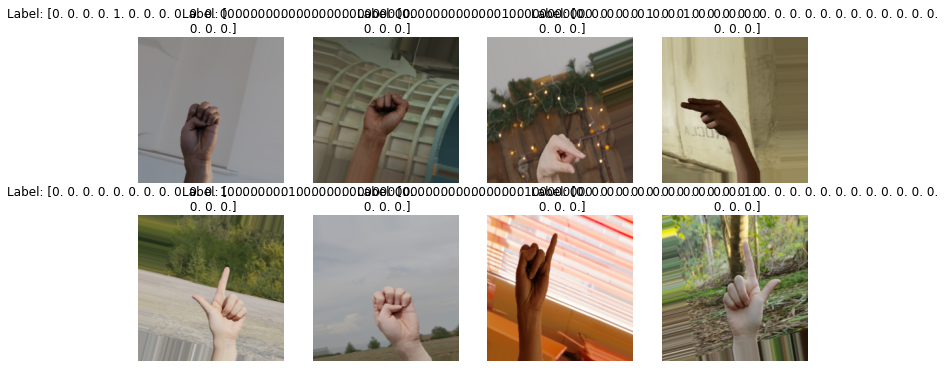

In [80]:
# Visualize the batch of images and labels
batch_data = train_generator.next()
batch_images, batch_labels = batch_data
plot_images(batch_images, batch_labels)

In [41]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, GlobalAveragePooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [58]:
base_model = tf.keras.models.load_model('epoch_custom_model.h5',custom_objects={'KerasLayer': hub.KerasLayer})

for layer in base_model.layers[:-10]:
    layer.trainable = False

new_output = tf.keras.layers.Dense(27, activation='softmax')

# Connect the base model and the new output layer
model_output = new_output(base_model.output)

new_model = tf.keras.Model(inputs=base_model.input, outputs=model_output)

# Compile the model
new_model.compile(optimizer=tf.keras.optimizers.Adam(1e-3), 
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [60]:
checkpoint_callback = ModelCheckpoint(filepath='tranferlearn_custom_model.h5', 
                                      save_best_only=False, 
                                      verbose=1)
#training model
print("\n Model summary: ")
print(new_model.summary())
print("\n Model Training: ")
history = new_model.fit(
    train_generator,
    epochs=5,  # You can adjust the number of epochs based on your training needs
    validation_data=validation_generator,
    callbacks=[checkpoint_callback]
)


 Model summary: 
Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_3_input (Input  [(None, 224, 224, 3)]     0         
 Layer)                                                          
                                                                 
 keras_layer_3 (KerasLayer)  (None, 1001)              3540265   
                                                                 
 dense_2 (Dense)             (None, 29)                29058     
                                                                 
 activation_2 (Activation)   (None, 29)                0         
                                                                 
 dense_19 (Dense)            (None, 27)                810       
                                                                 
Total params: 3570133 (13.62 MB)
Trainable params: 29868 (116.67 KB)
Non-trainable params: 3540265 (13.51 

/opt/anaconda3/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


608/608 [==============================] - 693s 1s/step - loss: 3.1176 - accuracy: 0.1473 - val_loss: 2.9587 - val_accuracy: 0.1899
Epoch 2/5
608/608 [==============================] - ETA: 0s - loss: 2.8111 - accuracy: 0.2274
Epoch 2: saving model to tranferlearn_custom_model.h5
608/608 [==============================] - 734s 1s/step - loss: 2.8111 - accuracy: 0.2274 - val_loss: 2.6867 - val_accuracy: 0.2434
Epoch 3/5
608/608 [==============================] - ETA: 0s - loss: 2.5761 - accuracy: 0.2588
Epoch 3: saving model to tranferlearn_custom_model.h5
608/608 [==============================] - 693s 1s/step - loss: 2.5761 - accuracy: 0.2588 - val_loss: 2.4757 - val_accuracy: 0.2675
Epoch 4/5
608/608 [==============================] - ETA: 0s - loss: 2.3945 - accuracy: 0.2756
Epoch 4: saving model to tranferlearn_custom_model.h5
608/608 [==============================] - 718s 1s/step - loss: 2.3945 - accuracy: 0.2756 - val_loss: 2.3287 - val_accuracy: 0.2724
Epoch 5/5
608/608 [======